In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model

## Inferencing

### Multiple Images Inferencing

In [15]:
emotion_classification_model = load_model('./model/model_fine_tune.h5')

In [16]:
class_labels  = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
img_height = 48
img_width = 48
batch_size = 64

In [17]:
preprocess_fun = tf.keras.applications.densenet.preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_fun)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocess_fun)

inf_ds = test_datagen.flow_from_directory(directory = './inferencing/',
                                                   target_size = (img_height ,img_width),
                                                    batch_size = batch_size,
                                                    shuffle  = False ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = 12
                                                  )

inf_pred = emotion_classification_model.predict(inf_ds)

Found 5 images belonging to 1 classes.
1/1 [==============================] - 0s 153ms/step


,image,prediction,angry,disgusted,fearful,happy,neutral,sad,surprised
0,./inferencing/image\1.jpg,"[happy, angry]",0.14%,0.0%,0.05%,99.51%,0.13%,0.03%,0.14%
1,./inferencing/image\2.jpg,"[angry, sad]",61.38%,1.23%,3.53%,1.36%,15.57%,16.79%,0.14%
2,./inferencing/image\3.jpg,"[surprised, happy]",0.17%,0.0%,0.55%,36.83%,0.98%,0.11%,61.36%
3,./inferencing/image\4.jpg,"[sad, neutral]",2.3%,0.01%,2.12%,0.23%,31.42%,63.89%,0.03%
4,./inferencing/image\5.jpg,"[neutral, sad]",2.93%,0.02%,4.21%,8.11%,75.13%,9.45%,0.15%


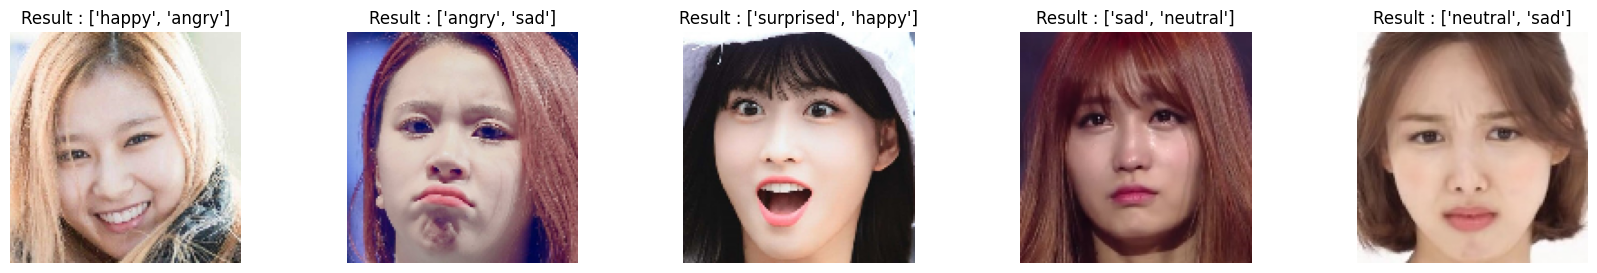

In [18]:
fig, axs = plt.subplots(1,5, figsize=(21,3))
prediction_result = pd.DataFrame(columns=["image", "prediction", "angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"])

for x,i in enumerate(inf_ds.filepaths):
    img =image.load_img(i, target_size=(128,128), keep_aspect_ratio=True)
    axs[x].imshow(img)
    axs[x].axis('off')
    max_pred = np.argsort(inf_pred[x])[-2:][::-1]
    pred_class = pd.DataFrame(class_labels).loc[max_pred][0].tolist()
    axs[x].set_title(f'Result : {pred_class}')
    
    data_inf = [i, pred_class]
    for i in inf_pred[x]:
        value = i *100
        data_inf.append(f'{value.round(2)}%')
        
    prediction_result.loc[len(prediction_result.index)] = data_inf

prediction_result

### Single Image Inference

In [19]:
img_path = 'inferencing\image\\2.jpg'

# Load and preprocess the image
img = image.load_img(img_path, keep_aspect_ratio=True, target_size=(48,48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= (255*117)  # Normalize the image

# Perform inference using the loaded model
inf_pred_single = emotion_classification_model.predict(img_array)


1/1 [==============================] - 0s 178ms/step


,angry,disgusted,fearful,happy,neutral,sad,surprised
0,54.16%,0.76%,4.12%,0.57%,26.78%,13.36%,0.24%


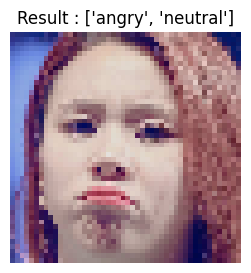

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(5, 3))  # Create a single subplot for one image

axs.imshow(img)
axs.axis('off')

max_pred_single = np.argsort(inf_pred_single[0])[-2:][::-1]

data_inf_single = []

rank = []

for i in inf_pred_single[0]:
    value = i * 100
    rank.append(value)
    data_inf_single.append(f'{value.round(2)}%')

rank = (-np.array(rank)).argsort()[:2]

pred_class_single = pd.DataFrame(class_labels).loc[rank][0].tolist()
axs.set_title(f'Result : {pred_class_single}')



prediction_result_single = pd.DataFrame(columns=["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"])
prediction_result_single.loc[len(prediction_result_single)] = data_inf_single

prediction_result_single